# Importing required libraries

In [149]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')


# Importing the dataset

In [150]:
# filename = '/home/shailesh/Desktop/fuse-project-1/dataset/orginal_dataset/pd_speech_features.csv'
filename = '../dataset/orginal_dataset/pd_speech_features.csv'
dataframe = pd.read_csv(filename)
dataframe.shape

(756, 755)

In [151]:
dataframe.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Data Extraction from the dataset

### Features in dataset
Baseline Features: Column-3 to Column-23  
Intensity Parameters: Col24 to Col26  
Formant Frequencies: Col27 to Col30  
Bandwidth Parameters: Col31 to Col34  
Vocal Fold: Col35 to Col56  
MFCC: Col57 to Col140  
Wavelet Features: Col141 to Col322  
TQWT Features: Col323 to Col754  

### Target
Class: Col755  
  
##### Refer Research Page: 6 - 9  

In [152]:
baseline = dataframe.iloc[:,2:23]
intensity = dataframe.iloc[:,23:26]
frequency = dataframe.iloc[:,26:30]
bandwidth = dataframe.iloc[:,30:34]
vocal = dataframe.iloc[:,34:56]
mfcc = dataframe.iloc[:,56:140]
wavelet = dataframe.iloc[:,140:322]
tqwt = dataframe.iloc[:,322:754]
y = dataframe.iloc[:,754:755]

### Baseline Columns

In [153]:
mean_value_columns = [cols for cols in baseline.columns if cols.__contains__('mean')]
std_value_columns = [cols for cols in baseline.columns if cols.__contains__('std')]
other_columns = list(set(baseline.columns) - set(mean_value_columns) - set(std_value_columns))

After Going through the paper, we can see that the baseline features and time frequency features are the most important features.

In [154]:
# Shailesh: getting dataframe with only baseline and time frequency features
extracted_df = baseline[other_columns].join([intensity,frequency,bandwidth])
extracted_df.shape

(756, 27)

In [155]:
extracted_df.head()

,ppq5Jitter,numPulses,RPDE,ddpJitter,PPE,locDbShimmer,apq11Shimmer,apq3Shimmer,rapJitter,numPeriodsPulses,...,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4
0,0.00129,240,0.57227,0.00200,0.85247,0.517,0.04828,0.03011,0.00067,239,...,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631
1,0.00112,234,0.53966,0.00157,0.76686,0.502,0.06195,0.02320,0.00052,233,...,73.046374,71.528945,564.363615,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722
2,0.00111,232,0.58982,0.00171,0.85083,0.897,0.07772,0.05094,0.00057,231,...,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339
3,0.00268,178,0.59257,0.00446,0.41121,0.527,0.04462,0.02395,0.00149,177,...,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599
4,0.00227,236,0.53028,0.00499,0.32790,0.497,0.05278,0.02909,0.00166,235,...,80.937258,79.183495,846.796144,1215.346469,3201.513132,4085.456839,402.216738,210.061394,203.637106,384.611697


# Data Preprocessing and Visualization

In [156]:
def draw_correlation_matrix(df:pd.DataFrame) -> None:
    """
    This function draws the correlation matrix of the given dataframe.

    :param df: pd.DataFrame
    :return: None
    """
    # Create the correlation matrix
    corr = df.corr().round(3)

    # Generate a mask for the upper triangle; True = do NOT show
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.tril_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(26, 10))
    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(
        corr,          # The data to plot
        mask=mask,     # Mask some cells
        annot=True,    # Should the values be plotted in the cells?
        vmax=1, vmin=-1, center=0,
        square=False, linewidths=.5,
        cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
    )

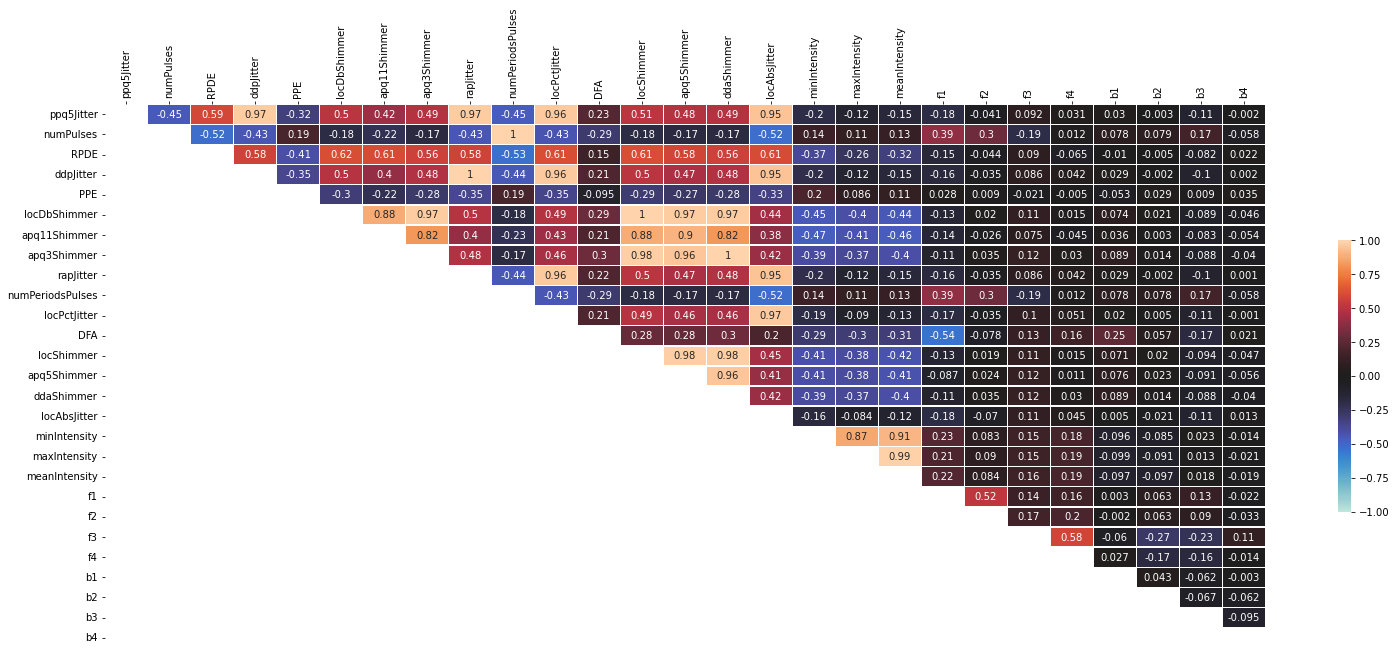

In [157]:
draw_correlation_matrix(extracted_df)

Highly Correlated Features :

1. meanintensity and **minintensity**
2. **locShimmer** and locDbShimmer
3. **locShimmer** and apq5Shimmer
4. ddpJitter and rapJitter
5. apq3Shimmer and ddaShimmer
6. numPulses and **numPeriodsPluses**

## Standarization

In [158]:
# extracted_df
for col in extracted_df.columns:
    extracted_df[col] = (extracted_df[col] - np.mean(extracted_df[col]))/np.std(extracted_df[col])
    

In [159]:
extracted_df.describe()

,ppq5Jitter,numPulses,RPDE,ddpJitter,PPE,locDbShimmer,apq11Shimmer,apq3Shimmer,rapJitter,numPeriodsPulses,...,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4
count,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,...,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02
mean,-4.699357e-18,-6.579099e-17,-2.819614e-17,9.398713e-18,9.116752e-16,-2.349678e-17,-2.819614e-16,1.879743e-17,6.109164e-17,-1.691768e-16,...,9.704172e-16,4.135434e-16,-4.699357e-18,6.767074e-16,-2.866608e-16,2.443665e-16,-1.409807e-17,-4.464389e-17,6.109164e-17,-7.049035e-17
std,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,...,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00,1.000662e+00
min,-6.618294e-01,-3.247213e+00,-2.437232e+00,-6.003492e-01,-4.165544e+00,-1.437080e+00,-1.621513e+00,-1.388095e+00,-5.968934e-01,-3.238264e+00,...,-4.967549e+00,-4.849727e+00,-3.040181e+00,-2.796180e+00,-2.928834e+00,-3.093087e+00,-6.514207e-01,-6.241174e-01,-6.840375e-01,-7.353228e-01
25%,-4.708539e-01,-7.359527e-01,-7.464066e-01,-4.642993e-01,9.781373e-02,-7.524381e-01,-7.195235e-01,-7.396864e-01,-4.642489e-01,-7.316384e-01,...,-4.365912e-01,-4.386474e-01,-6.250186e-01,-6.896491e-01,-4.630369e-01,-7.439279e-01,-3.990689e-01,-4.319827e-01,-5.094405e-01,-5.105147e-01
50%,-3.037504e-01,-7.031752e-02,-3.423773e-02,-3.316507e-01,3.745726e-01,-2.718154e-01,-2.306051e-01,-2.861247e-01,-3.316044e-01,-6.723164e-02,...,3.796817e-01,4.075513e-01,-4.443599e-02,-1.095285e-01,1.266461e-01,-9.339822e-03,-2.338937e-01,-3.049676e-01,-3.593011e-01,-3.019247e-01
75%,5.582064e-02,6.079244e-01,7.095471e-01,4.673806e-02,5.203332e-01,4.971809e-01,4.722936e-01,4.603788e-01,4.592239e-02,6.097586e-01,...,6.623725e-01,6.732543e-01,6.676731e-01,6.271486e-01,6.857404e-01,7.481222e-01,6.759116e-02,6.088305e-03,-2.387638e-02,7.755682e-02
max,1.024168e+01,5.880057e+00,2.782440e+00,1.065778e+01,9.538615e-01,3.943278e+00,6.549389e+00,4.301169e+00,1.065748e+01,5.862096e+00,...,1.580334e+00,1.582599e+00,2.731173e+00,4.076820e+00,2.323395e+00,2.689607e+00,1.477155e+01,8.814477e+00,7.401039e+00,8.052606e+00


### Prinicipal Component Analysis

We've 27 features. So let's first generate 27 PCA components and check how much information does each pca components can carries/captures variance.

In [160]:
n_components = 27
pca = PCA(n_components)
pca.fit(np.array(extracted_df))

PCA(n_components=27)

In [161]:
pca_column = []
for idx in range(n_components):
    pca_column.append(f"PCA{idx+1}")

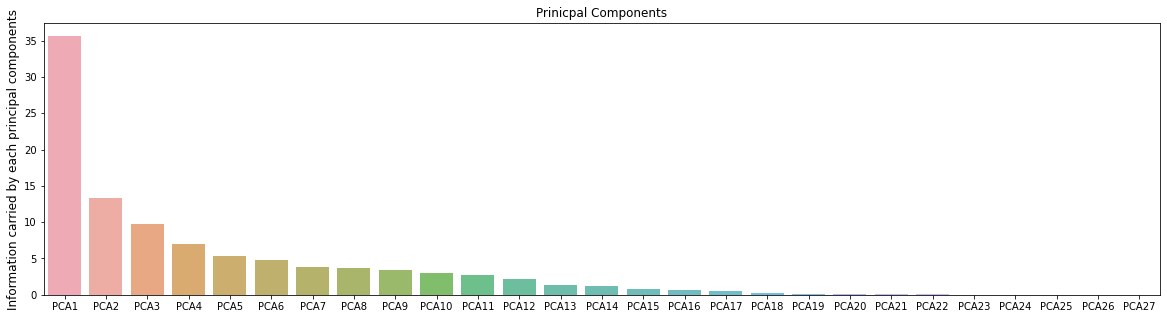

In [162]:
# Plotting how much information does each pca 
plt.figure(figsize=(20,5))
sns.barplot(pca_column, increasing_variance*100, alpha=0.8)
plt.title('Prinicpal Components')
plt.ylabel('Information carried by each principal components', fontsize=12)
# plt.xlabel('city', fontsize=12)
plt.show()

In [163]:
increasing_variance = pca.explained_variance_ratio_

Checking how many components has less than 1% variance.

Note: 14 components has more than 1% variance.

In [164]:
(increasing_variance*100 < 1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [165]:
np.sum(increasing_variance[:15])

0.9817325181276881

If we take 15 pca components. It can stil captures 98% of our data. 

Note : If we take 17 components, we'll get 99.3%.  
We're able to lower our features from 27 down to 7 and still captures 98% of information present in dataset. [That's sick right there.]

In [166]:
n_components = 15
pca = PCA(n_components)
pca.fit(np.array(extracted_df))


PCA(n_components=15)

In [167]:
pca_column = []
for idx in range(n_components):
    pca_column.append(f"PCA{idx+1}")

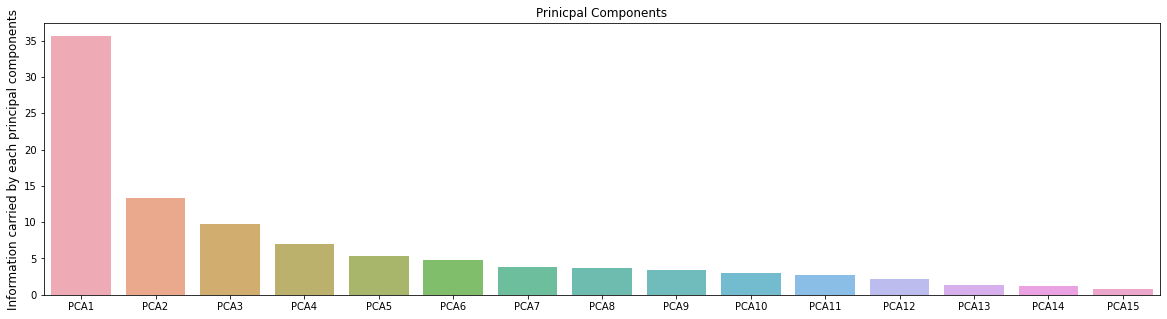

In [169]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
plt.figure(figsize=(20,5))
sns.barplot(pca_column, pca.explained_variance_ratio_*100, alpha=0.8)
plt.title('Prinicpal Components')
plt.ylabel('Information carried by each principal components', fontsize=12)
# plt.xlabel('city', fontsize=12)
plt.show()

In [170]:
check = pca.fit_transform(extracted_df)

In [171]:
pca_column = []
for idx in range(n_components):
    pca_column.append(f"PCA{idx+1}")

In [172]:
df_new = pd.DataFrame(check, columns=pca_column)

In [173]:
df_new.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,0.216392,0.760318,-1.527107,-0.835018,-0.642949,-0.073689,-0.125593,-0.049847,-0.538222,-0.238394,0.401886,0.208016,0.629492,0.221158,-0.410618
1,0.091393,0.378302,-1.924431,-0.434816,-0.748449,-0.526039,-0.190650,-0.323622,-0.292333,-0.685120,0.442801,0.171242,0.335723,0.202347,-0.178201
2,1.957437,-1.065898,-1.145795,-0.949530,-1.117417,-0.378729,-0.151215,-0.318204,-0.570924,-0.590749,1.018559,0.369776,0.639398,0.643748,0.056712
3,1.274183,3.470307,0.474914,-1.272005,1.163555,-0.625062,-0.673031,-1.083243,1.478879,0.122895,-0.772925,0.771649,-0.367925,0.263321,-1.107998
4,1.407626,3.131725,1.075585,-1.022410,1.595140,0.012255,-0.736598,-0.965839,1.749980,-0.570271,-0.773955,0.666108,-0.750309,0.139843,-0.967214


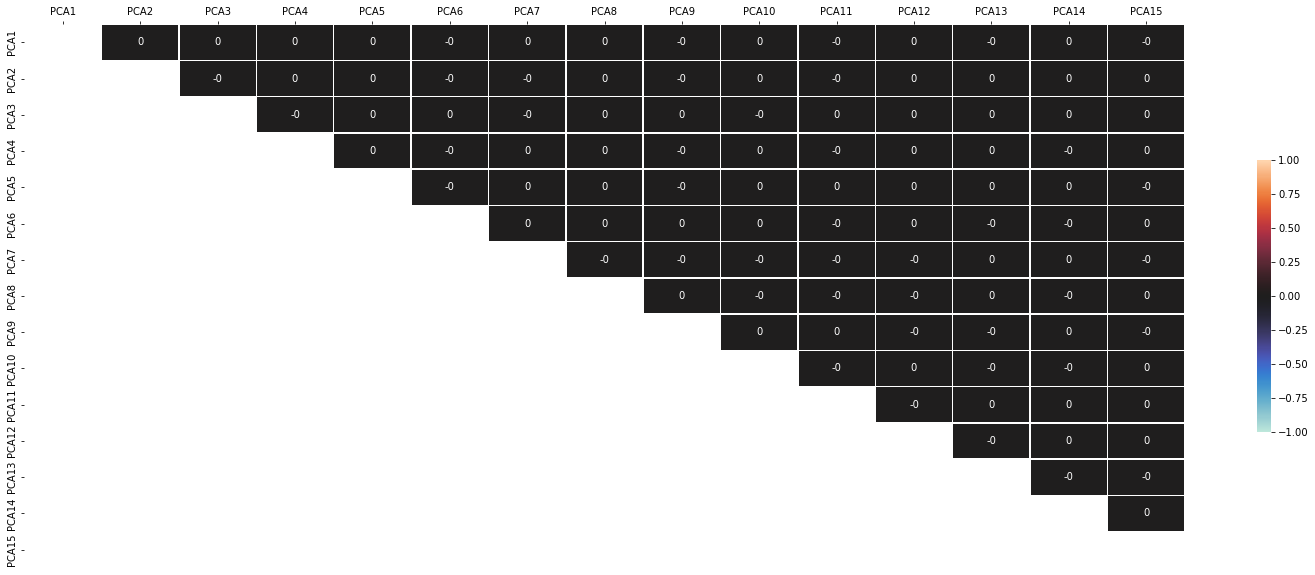

In [174]:
draw_correlation_matrix(df_new)

Note: Notice there is no any correlation in the transformed features.

if we do pca without Standarization, the high value features were supressing others and 7 pca components were able to capture 98% information